## Question 1

In [1]:
import matplotlib.pyplot as plt
import math
import statistics as st
import numpy as np
import scipy.linalg as la
from datetime import datetime
import sympy as sym

In [2]:
def myawgn(PSD,B,Fs,l):
    sigma = math.sqrt(2*PSD*B)
    #sigma is the standard deviation
    print("Power = ",2*PSD*B)
    
    N = 1000   
    x = sigma*(np.random.randn(N,l))
    awgn_sequence = x[0]
    
    y = abs(np.fft.fft(x))
    y_conjugate = np.conjugate(y)
    y_squared = np.multiply(y,y_conjugate)
    y_mean = np.mean(y_squared,axis = 1)
    y_mean = y_mean/(Fs*l);
    calculated_psd = np.mean(y_mean);
    
    print("Calculated PSD = ",calculated_psd)
    
    #plotting
    plt.figure()
    plt.plot(y_mean, color = 'green', label='Mean using sample functions')
    plt.axhline(y=calculated_psd, color='r', linestyle='-', label = 'Calculated PSD')
    plt.axhline(y=PSD, color='blue', linestyle='dotted', label = 'Given PSD')
    plt.legend()
    plt.show
    
    return awgn_sequence

PSD: 500
Bandwidth: 100
Sampling frequency: 200
Length of the sequence: 100
Power =  100000.0
Calculated PSD =  499.62865520038287
AWGN sequence:  [ -63.1883158   -30.30034849 -487.90825773    2.88530468  453.34884672
  157.45437847  358.54106572   65.05732307 -173.00605684  -66.21298834
  162.00968037 -395.79322876  -40.65913935 -502.3528279  -475.10786342
  275.72247005  -78.47524434   57.00977342 -353.63290708  841.32556083
  123.76817864 -223.57959561   45.53465964  566.00146115 -254.06178308
  -14.69507249   15.87616293  -47.04123643   -6.29181226 -305.87022882
  -86.2503694  -308.49723826  276.18543042  380.10467814  266.81765095
  -41.40624006  -58.06389959  183.87169631  244.5020607   239.46837821
 -130.52643272 -108.51309366  497.02920536   77.22744297  -93.85479116
  -54.03936399   -3.84286435 -142.46691993 -635.02462288 -258.01506651
  194.7955846   239.60421231  -37.26378136 -153.36999968 -132.86830177
 -110.1441766    74.67802492 -272.5215257   192.93036199  297.81312062
 

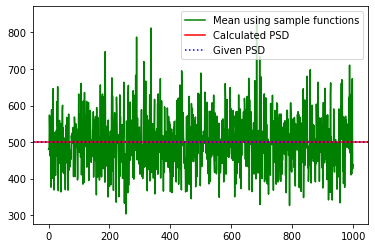

In [3]:
PSD = float(input('PSD: '))
B = float(input('Bandwidth: '))
Fs = float(input('Sampling frequency: '))
l = int(input('Length of the sequence: '))
awgn = myawgn(PSD,B,Fs,l)
print("AWGN sequence: ",awgn)

## Question 2

In [98]:
# library function to check PSD
def posSymDef(mat):
    return np.all(np.linalg.eigvals(mat) > 0)

def mygauss(mu,cov,s):
    
    eigval,m1 = la.eig(cov);    
    m1 = np.array(m1).astype(float);
    m1_inv = np.linalg.inv(m1);
    m2 = np.matmul(m1_inv,cov);
    m2 = np.matmul(m2,m1);
    
    for i in range(len(m2)):
        m2[i][i] = np.sqrt(m2[i][i]);

    M = np.matmul(m1,m2);
    M = np.matmul(M,m1_inv);
    ans = np.matmul(np.random.randn(s, len(m2)),M);
    
    for i in range(s):
        ans[i] = ans[i] + mu;
    print('\nSamples:');
    print(ans);
    
    print('\nnCalculated Mean Vector:');
    mu = [];
    ans = np.transpose(ans);
    for i in range(len(m2)): 
        mu.append(np.mean(ans[i]));
    print(mu);
    
    print('\nCalculated Covariance Matrix:');
    print(np.cov(ans));
    print('\nCalculated matrix SPD?: '+str(posSymDef(cov)));

In [99]:
cov = np.array([[2, -1, 0],
                [-1, 2, -1],
                [0, -1, 2]]);
mu = np.array([1,3,-5]);

print('Entered Mean Vector:');
print(mu);
print('\nEntered Covariance Matrix:');
print(cov);

mygauss(mu,cov,10000);

Entered Mean Vector:
[ 1  3 -5]

Entered Covariance Matrix:
[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]

Samples:
[[ 2.27245347  3.74835475 -4.92158801]
 [ 1.32351737  3.1138373  -4.42843656]
 [-1.03306035  3.20168876 -4.58216342]
 ...
 [ 2.10660157  2.5021356  -4.0390566 ]
 [-0.89349965  2.99326262 -3.91112794]
 [ 4.27345841  1.58214423 -5.61441073]]

nCalculated Mean Vector:
[1.0276328076669954, 2.9972976825552564, -5.00488836153047]

Calculated Covariance Matrix:
[[ 1.96346091 -0.9804628   0.02611028]
 [-0.9804628   2.03602456 -1.0387728 ]
 [ 0.02611028 -1.0387728   2.01094941]]

Calculated matrix SPD?: True
